In [2]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy


# import the requests library
import requests

# import the API key
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=12dc0e98aa28348d65497aae53a01a6f


In [3]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lavrentiya
Processing Record 2 of Set 1 | fare
Processing Record 3 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 1 | avarua
Processing Record 5 of Set 1 | lompoc
Processing Record 6 of Set 1 | mahebourg
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | meulaboh
Processing Record 9 of Set 1 | green valley
Processing Record 10 of Set 1 | moorhead
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | klaksvik
Processing Record 14 of Set 1 | arraial do cabo
Processing Record 15 of Set 1 | port blair
Processing Record 16 of Set 1 | deniliquin
Processing Record 17 of Set 1 | clyde river
Processing Record 18 of Set 1 | deputatskiy
Processing Record 19 of Set 1 | cayenne
Processing Record 20 of Set 1 | inhambane
Processing Record 21 of Set 1 | masallatah
Processing Record 22 of Set 1 | cidr

Processing Record 35 of Set 4 | touros
Processing Record 36 of Set 4 | muros
Processing Record 37 of Set 4 | georgetown
Processing Record 38 of Set 4 | dudinka
Processing Record 39 of Set 4 | bonthe
Processing Record 40 of Set 4 | barcelos
Processing Record 41 of Set 4 | oktyabrskoye
Processing Record 42 of Set 4 | sobolevo
Processing Record 43 of Set 4 | barrow
Processing Record 44 of Set 4 | butaritari
Processing Record 45 of Set 4 | alta
Processing Record 46 of Set 4 | san carlos de bariloche
Processing Record 47 of Set 4 | dire dawa
Processing Record 48 of Set 4 | vizinga
Processing Record 49 of Set 4 | mpulungu
Processing Record 50 of Set 4 | qasigiannguit
Processing Record 1 of Set 5 | inta
Processing Record 2 of Set 5 | okhotsk
Processing Record 3 of Set 5 | kurilsk
Processing Record 4 of Set 5 | lebu
Processing Record 5 of Set 5 | bengkulu
Processing Record 6 of Set 5 | zabol
Processing Record 7 of Set 5 | alta floresta
Processing Record 8 of Set 5 | hithadhoo
Processing Record

City not found. Skipping...
Processing Record 29 of Set 8 | cheyenne
Processing Record 30 of Set 8 | narsaq
Processing Record 31 of Set 8 | marsa matruh
Processing Record 32 of Set 8 | chagda
City not found. Skipping...
Processing Record 33 of Set 8 | tari
Processing Record 34 of Set 8 | el cobre
Processing Record 35 of Set 8 | makakilo city
Processing Record 36 of Set 8 | nishihara
Processing Record 37 of Set 8 | mount darwin
Processing Record 38 of Set 8 | nylstroom
City not found. Skipping...
Processing Record 39 of Set 8 | novopokrovka
Processing Record 40 of Set 8 | kroya
Processing Record 41 of Set 8 | la palma
Processing Record 42 of Set 8 | karkaralinsk
City not found. Skipping...
Processing Record 43 of Set 8 | shelburne
Processing Record 44 of Set 8 | leningradskiy
Processing Record 45 of Set 8 | sabha
Processing Record 46 of Set 8 | paradwip
City not found. Skipping...
Processing Record 47 of Set 8 | lilongwe
Processing Record 48 of Set 8 | brazzaville
Processing Record 49 o

Processing Record 15 of Set 12 | champerico
Processing Record 16 of Set 12 | beringovskiy
Processing Record 17 of Set 12 | mogadishu
Processing Record 18 of Set 12 | kununurra
Processing Record 19 of Set 12 | nedjo
Processing Record 20 of Set 12 | matara
Processing Record 21 of Set 12 | lata
Processing Record 22 of Set 12 | road town
Processing Record 23 of Set 12 | pangnirtung
Processing Record 24 of Set 12 | hildburghausen
Processing Record 25 of Set 12 | palauig
Processing Record 26 of Set 12 | tocopilla
Processing Record 27 of Set 12 | yinchuan
Processing Record 28 of Set 12 | olutanga
Processing Record 29 of Set 12 | bafoulabe
Processing Record 30 of Set 12 | surgut
Processing Record 31 of Set 12 | raudeberg
Processing Record 32 of Set 12 | matane
Processing Record 33 of Set 12 | channel-port aux basques
Processing Record 34 of Set 12 | svetlogorsk
Processing Record 35 of Set 12 | gat
Processing Record 36 of Set 12 | anan
Processing Record 37 of Set 12 | tromso
Processing Record 3

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lavrentiya,65.5833,-171.0000,-20.87,87,61,5.37,RU,2022-01-25 22:37:00
1,Fare,-16.7000,-151.0167,81.05,77,78,15.93,PF,2022-01-25 22:39:07
2,Avarua,-21.2078,-159.7750,80.65,83,75,8.05,CK,2022-01-25 22:34:25
3,Lompoc,34.6391,-120.4579,69.69,68,0,11.50,US,2022-01-25 22:39:08
4,Mahebourg,-20.4081,57.7000,77.29,69,40,11.50,MU,2022-01-25 22:39:08
5,Punta Arenas,-53.1500,-70.9167,51.91,50,75,25.32,CL,2022-01-25 22:35:03
6,Meulaboh,4.1363,96.1285,75.67,90,91,2.93,ID,2022-01-25 22:39:09
7,Green Valley,31.8543,-110.9937,69.28,21,29,10.58,US,2022-01-25 22:39:09
8,Moorhead,46.8739,-96.7676,-7.58,67,0,9.22,US,2022-01-25 22:39:10
9,Rikitea,-23.1203,-134.9692,78.64,75,100,17.54,PF,2022-01-25 22:39:10


In [12]:
# Reorder columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [14]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lavrentiya,RU,2022-01-25 22:37:00,65.5833,-171.0000,-20.87,87,61,5.37
1,Fare,PF,2022-01-25 22:39:07,-16.7000,-151.0167,81.05,77,78,15.93
2,Avarua,CK,2022-01-25 22:34:25,-21.2078,-159.7750,80.65,83,75,8.05
3,Lompoc,US,2022-01-25 22:39:08,34.6391,-120.4579,69.69,68,0,11.50
4,Mahebourg,MU,2022-01-25 22:39:08,-20.4081,57.7000,77.29,69,40,11.50
5,Punta Arenas,CL,2022-01-25 22:35:03,-53.1500,-70.9167,51.91,50,75,25.32
6,Meulaboh,ID,2022-01-25 22:39:09,4.1363,96.1285,75.67,90,91,2.93
7,Green Valley,US,2022-01-25 22:39:09,31.8543,-110.9937,69.28,21,29,10.58
8,Moorhead,US,2022-01-25 22:39:10,46.8739,-96.7676,-7.58,67,0,9.22
9,Rikitea,PF,2022-01-25 22:39:10,-23.1203,-134.9692,78.64,75,100,17.54


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

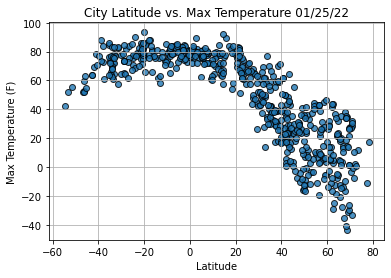

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title("City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

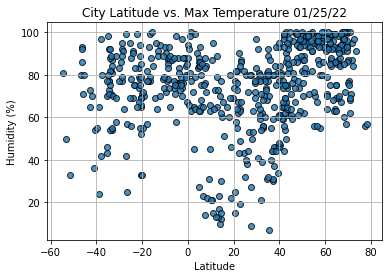

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

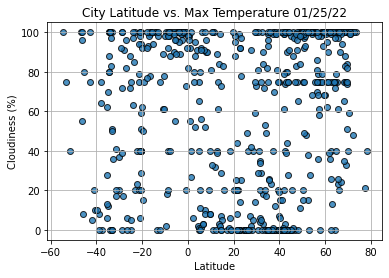

In [20]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

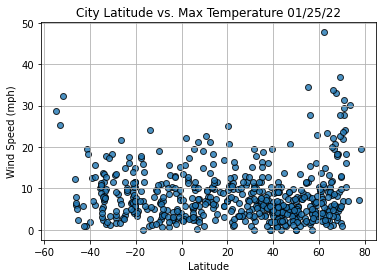

In [21]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()